<a href="https://colab.research.google.com/github/Reichidad/Machine-Learning-2020-Spring-Class/blob/assignment03/assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 03. Visualization of Gradient Descent algorithm based on Linear Regression problem - 20145822 김영현
---
## 1. Input points

## 2. Linear regression result

## 3. Plot the energy surface

## 4. Plot the gradient descent path on the energy surface

No handles with labels found to put in legend.


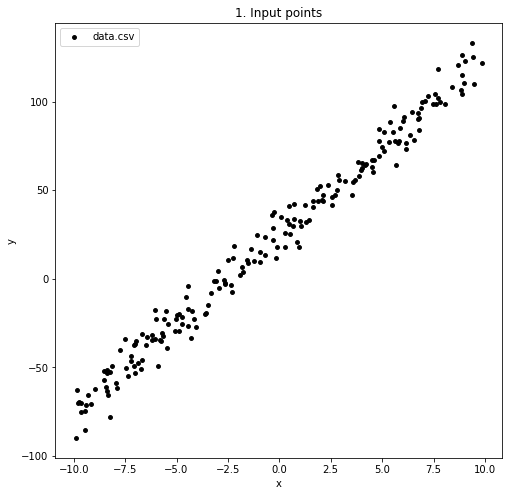

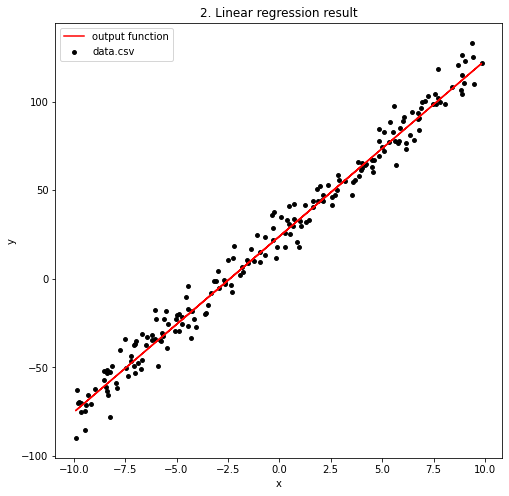

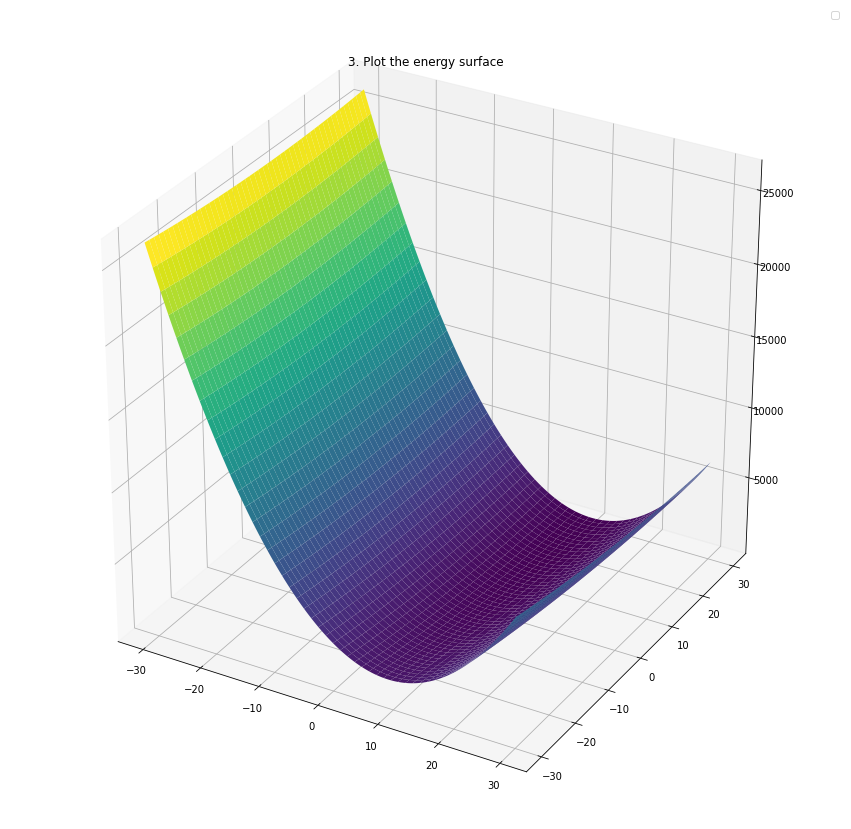

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Input data file read
path = "/content/drive/My Drive/Colab Notebooks/data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]
m = x_data.size

# objective_function
# calculate the cost function for each iteration
def objective_function(h, y_data, m):
  j = []
  for i in range(m):
    j.append(h[i] - y_data[i])
    j[i] = j[i] ** 2
  return sum(j)/(2*m)


# calculate next iteration's theta_0
def theta_0_desc(theta_0, h, y_data, m, alpha):
  minus = [h[i]-y_data[i] for i in range(m)]
  return theta_0 - (alpha*sum(minus)/m)


#calculate next iteration's theta_1
def theta_1_desc(theta_1, h, y_data, x_data , m, alpha):
  minus = [(h[i]-y_data[i])*x_data[i] for i in range(m)]
  return theta_1 - (alpha*sum(minus)/m)
  
# initial values
theta_0 = -30
theta_1 = -30
alpha = 0.0001

# lists for saving iteration data
cost = []
theta_0_list = []
theta_1_list = []

# iteration for optimizing
iteration = 0

while True:
  h = [theta_0 + theta_1 * i for i in x_data]
  cost.append(objective_function(h,y_data,m))
  theta_0_list.append(theta_0)
  theta_1_list.append(theta_1)

  if iteration > 0 :
    if cost[iteration-1] - cost[iteration] < 0.0001 :
      break

  theta_0 = theta_0_desc(theta_0, h, y_data, m, alpha)
  theta_1 = theta_1_desc(theta_1, h, y_data, x_data, m, alpha)
  iteration+= 1

# result data
regression_result = [theta_0_list[iteration] + theta_1_list[iteration] * i for i in x_data] 
iterations = [i for i in range(len(cost))]

# 1. Input points
# plot a set of points that are loaded from 'data.csv' file (in black color)
plt.figure(1, figsize=(8,8))
plt.title("1. Input points")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x_data, y_data, s=15, c='k', label="data.csv")
plt.legend()

# 2. Linear regression result
# plot a set of points that are loaded from 'data.csv' file (in black color)
# plot a straight line obtained by the optimal linear regression
# based on the given set of points (in red color)
plt.figure(2, figsize=(8,8))
plt.title("2. Linear regression result")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_data, regression_result, c='r', label="output function")
plt.scatter(x_data, y_data, c='k', s=15, label="data.csv")
plt.legend()

# 3. Plot the energy surface
# plot the energy surface

val = np.arange(-30, 30, 0.1)
X, Y = np.meshgrid(val, val)
z_val_list = []

for t_zero in list(val):
  for t_one in list(val):
    h= [t_zero + t_one * i for i in x_data]
    z_val_list.append(objective_function(h,y_data,m))

z_val = np.array(z_val_list)
Z = z_val.reshape(X.shape)

fig = plt.figure(3, figsize=(15,15))
ax = fig.gca(projection='3d')
plt.title("3. Plot the energy surface")
surf = ax.plot_surface(X, Y, Z, cmap='viridis', zorder=0)
plt.legend()

plt.show()